In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [8]:
data = pd.read_csv(r'C:\Users\karthik\Desktop\GOOG.csv', date_parser = True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [9]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3885,2020-01-27,1431.000000,1438.069946,1421.199951,1433.900024,1433.900024,1755200
3886,2020-01-28,1443.000000,1456.000000,1432.469971,1452.560059,1452.560059,1577400
3887,2020-01-29,1458.800049,1465.430054,1446.739990,1458.630005,1458.630005,1077700
3888,2020-01-30,1439.959961,1457.280029,1436.400024,1455.839966,1455.839966,1339400
3889,2020-01-31,1468.900024,1470.130005,1428.530029,1434.229980,1434.229980,2415600


## Dividing data into train and test

In [10]:
data_training = data[data['Date']<'2019-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3612,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
3613,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
3614,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
3615,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800


In [11]:
data_test = data[data['Date']>'2019-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...,...
3885,2020-01-27,1431.000000,1438.069946,1421.199951,1433.900024,1433.900024,1755200
3886,2020-01-28,1443.000000,1456.000000,1432.469971,1452.560059,1452.560059,1577400
3887,2020-01-29,1458.800049,1465.430054,1446.739990,1458.630005,1458.630005,1077700
3888,2020-01-30,1439.959961,1457.280029,1436.400024,1455.839966,1455.839966,1339400


In [12]:
data_training.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
Train_data=data_training.drop(['Date','Adj Close'],axis=1)
Train_data.head()

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100


In [14]:
scaler = MinMaxScaler()#Takes min value 0 and max val 1.
Train_data = scaler.fit_transform(Train_data)
Train_data

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79975186e-02]])

## create RNN with 60 timesteps, i.e. look 60 previous time steps

In [15]:
X_train = []#read first 60 days of data and put it in x_train
y_train = []

for i in range(60, Train_data.shape[0]):
    X_train.append(Train_data[i-60:i])
    y_train.append(Train_data[i, 0])

In [17]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape

(3557, 60, 5)

## Building LSTM

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [35]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

In [36]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [37]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Train on 3557 samples
Epoch 1/50
3557/3557 [==============================] - 48s 13ms/sample - loss: 0.0155
Epoch 2/50
3557/3557 [==============================] - 34s 10ms/sample - loss: 0.0048
Epoch 3/50
3557/3557 [==============================] - 29s 8ms/sample - loss: 0.0039
Epoch 4/50
3557/3557 [==============================] - 30s 8ms/sample - loss: 0.0044
Epoch 5/50
3557/3557 [==============================] - 29s 8ms/sample - loss: 0.0036
Epoch 6/50
3557/3557 [==============================] - 29s 8ms/sample - loss: 0.0035
Epoch 7/50
3557/3557 [==============================] - 29s 8ms/sample - loss: 0.0031
Epoch 8/50
3557/3557 [==============================] - 29s 8ms/sample - loss: 0.0030
Epoch 9/50
3557/3557 [==============================] - 29s 8ms/sample - loss: 0.0026
Epoch 10/50
3557/3557 [==============================] - 29s 8ms/sample - loss: 0.0025
Epoch 11/50
3557/3557 [==============================] - 29s 8ms/sample - loss: 0.0024
Epoch 12/50
3557/3557 [=====

## Test Dataset

In [38]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [39]:
data_test.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3885,2020-01-27,1431.000000,1438.069946,1421.199951,1433.900024,1433.900024,1755200
3886,2020-01-28,1443.000000,1456.000000,1432.469971,1452.560059,1452.560059,1577400
3887,2020-01-29,1458.800049,1465.430054,1446.739990,1458.630005,1458.630005,1077700
3888,2020-01-30,1439.959961,1457.280029,1436.400024,1455.839966,1455.839966,1339400
3889,2020-01-31,1468.900024,1470.130005,1428.530029,1434.229980,1434.229980,2415600


In [40]:
past_60_days = data_training.tail(60)
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [41]:
inputs = scaler.transform(df)
inputs

array([[0.93805611, 0.93755773, 0.92220906, 0.91781776, 0.0266752 ],
       [0.91527437, 0.91792904, 0.91350452, 0.90892169, 0.01425359],
       [0.90103881, 0.91343268, 0.89872289, 0.90204445, 0.02331778],
       ...,
       [1.15373408, 1.15658803, 1.16459941, 1.15617417, 0.01296199],
       [1.13831149, 1.14992521, 1.15599152, 1.15388446, 0.01613282],
       [1.16200197, 1.16043034, 1.14943984, 1.13614972, 0.02917236]])

In [42]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [43]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((273, 60, 5), (273,))

In [44]:
y_pred = regressor.predict(X_test)

scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162775e-08])

In [45]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [46]:
y_pred = y_pred*scale
y_test = y_test*scale

## Visualization

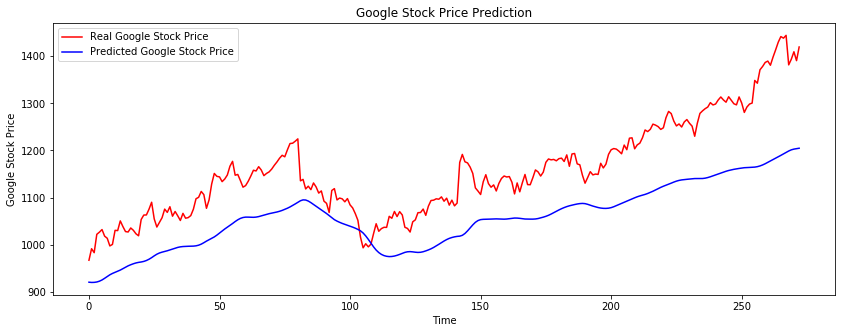

In [47]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()